In [1]:
# install joblib 
# Restart kernel after installing 
!pip install joblib

In [2]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/dameducharme/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages (0.0)


In [3]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

In [4]:
# Dependecies
%matplotlib inline
import matplotlib.pyplot as plt
import joblib
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets

In [5]:
# Read the billboard data into pandas
df2 = pd.read_csv('data/grouped_audio_billboard_genre_data.csv')

# Drop the null columns where all values are null
df2 = df2.dropna(axis='columns', how='all')

# Drop the null rows
df2 = df2.dropna()
df2.head()

# Display dataframe 
df2.head()

,track_id,genre,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,week_pos,instance,peak_pos,weeks_on_chart
0,"AdictoTainy, Anuel AA & Ozuna",pop,0.0,270740.0,91.0,0.734,0.836,10.0,-4.803,0.0,...,0.01700,0.000016,0.1790,0.623,80.002,4.0,98.0,1.0,86.0,2.0
1,The Ones That Didn't Make It Back HomeJustin M...,country,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,...,0.00000,0.000000,0.0000,0.000,0.000,0.0,100.0,1.0,100.0,1.0
2,ShallowLady Gaga & Bradley Cooper,pop,0.0,215733.0,89.0,0.572,0.385,7.0,-6.362,1.0,...,0.37100,0.000000,0.2310,0.323,95.799,4.0,28.0,1.0,28.0,1.0
3,EnemiesPost Malone Featuring DaBaby,rap,1.0,196760.0,86.0,0.542,0.674,6.0,-4.169,1.0,...,0.05880,0.000000,0.0955,0.667,76.388,4.0,98.0,1.0,16.0,15.0
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo",rap,1.0,228185.0,61.0,0.948,0.623,8.0,-5.725,0.0,...,0.00124,0.000001,0.0716,0.856,135.979,4.0,94.0,1.0,94.0,3.0


In [6]:
# Assigning numbers to genre
df2['genre'] = df2['genre'].replace('pop',float(0)).replace('country',float(1))\
.replace('hiphop',float(2)).replace('other',float(3)).replace('latin',float(3)).replace('latin',float(4))\
.replace('house',float(5)).replace('folk',float(6)).replace('r&b',float(7)).replace('adult standards',float(8))\
.replace('rock',float(9)).replace('metal',float(10)).replace('show tunes',float(11)).replace('soul',float(12))\
.replace('rap',float(13)).replace('jazz',float(14))

In [7]:
# Discretize variable into equal-sized buckets
df2['target'] = pd.qcut(df2['peak_pos'],10, labels = False)

## Create a Train Test Split

Use `target`for the y values

In [8]:
from sklearn.model_selection import train_test_split
y = pd.Series(df2["target"])
X = df2.drop(columns=["track_id", "target" ])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
y.describe()

count    28375.000000
mean         4.339912
std          2.802909
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: target, dtype: float64

In [10]:
X_train

,genre,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,week_pos,instance,peak_pos,weeks_on_chart
11734,9.0,0.0,245640.0,77.0,0.817,0.599,0.0,-9.249,0.0,0.0328,0.1320,0.000311,0.0873,0.548,108.873,4.0,73.0,1.0,73.0,1.0
28040,9.0,0.0,258399.0,63.0,0.569,0.744,8.0,-6.480,1.0,0.0298,0.0559,0.000003,0.0915,0.655,96.596,4.0,34.0,1.0,34.0,1.0
12045,3.0,0.0,240866.0,61.0,0.634,0.677,5.0,-7.278,0.0,0.0304,0.0117,0.001030,0.1260,0.558,135.012,4.0,67.0,1.0,67.0,1.0
14139,9.0,0.0,132280.0,0.0,0.714,0.464,8.0,-11.080,1.0,0.0514,0.9000,0.283000,0.1030,0.921,124.553,4.0,80.0,1.0,77.0,2.0
23223,8.0,0.0,135506.0,53.0,0.570,0.259,7.0,-14.393,1.0,0.0332,0.8050,0.000000,0.1120,0.485,124.863,4.0,100.0,1.0,100.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,14.0,0.0,189946.0,38.0,0.706,0.467,7.0,-9.523,1.0,0.0852,0.7130,0.000000,0.2530,0.735,107.053,4.0,63.0,1.0,63.0,1.0
17289,14.0,0.0,151866.0,7.0,0.652,0.656,7.0,-7.156,1.0,0.0967,0.2590,0.050900,0.1420,0.771,161.895,4.0,92.0,1.0,92.0,1.0
5192,9.0,0.0,162986.0,19.0,0.587,0.649,9.0,-9.411,1.0,0.0321,0.6050,0.000006,0.1390,0.831,96.111,4.0,89.0,1.0,89.0,1.0
12172,9.0,0.0,233506.0,63.0,0.626,0.565,9.0,-10.027,1.0,0.0271,0.1240,0.000000,0.0811,0.924,116.610,4.0,65.0,1.0,65.0,1.0


In [11]:
y_train

11734    2
28040    0
12045    1
14139    2
23223    9
        ..
10955    1
17289    6
5192     5
12172    1
235      0
Name: target, Length: 21281, dtype: int64

## Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [12]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Create a Deep Learning Model

In [13]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

In [14]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [15]:
y_train_categorical

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
X_train_scaled.shape

(21281, 20)

In [17]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=20))
model.add(Dense(units=10, activation='softmax'))

In [18]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
666/666 - 0s - loss: 2.2319 - accuracy: 0.1785
Epoch 2/100
666/666 - 0s - loss: 2.0189 - accuracy: 0.2511
Epoch 3/100
666/666 - 0s - loss: 1.8441 - accuracy: 0.3155
Epoch 4/100
666/666 - 0s - loss: 1.7112 - accuracy: 0.3821
Epoch 5/100
666/666 - 0s - loss: 1.6061 - accuracy: 0.4236
Epoch 6/100
666/666 - 0s - loss: 1.5203 - accuracy: 0.4613
Epoch 7/100
666/666 - 0s - loss: 1.4489 - accuracy: 0.4911
Epoch 8/100
666/666 - 0s - loss: 1.3872 - accuracy: 0.5128
Epoch 9/100
666/666 - 0s - loss: 1.3343 - accuracy: 0.5406
Epoch 10/100
666/666 - 0s - loss: 1.2870 - accuracy: 0.5581
Epoch 11/100
666/666 - 0s - loss: 1.2444 - accuracy: 0.5786
Epoch 12/100
666/666 - 0s - loss: 1.2065 - accuracy: 0.5894
Epoch 13/100
666/666 - 0s - loss: 1.1718 - accuracy: 0.6104
Epoch 14/100
666/666 - 0s - loss: 1.1394 - accuracy: 0.6229
Epoch 15/100
666/666 - 0s - loss: 1.1106 - accuracy: 0.6359
Epoch 16/100
666/666 - 0s - loss: 1.0828 - accuracy: 0.6501
Epoch 17/100
666/666 - 1s - loss: 1.0570 - accura

## Quantify our Trained Model

In [21]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

222/222 - 0s - loss: 0.3834 - accuracy: 0.9401
Normal Neural Network - Loss: 0.38336366415023804, Accuracy: 0.9400902390480042


## Save the Model

In [22]:
# Save the model
model.save('Models/billb_spot_DL.h5')
# Load the model
from tensorflow.keras.models import load_model
billboard_spotify_model = load_model('Models/billb_spot_DL.h5')

# import joblib
# filename = 'Models/billb_spot_DL.sav'
# joblib.dump(model, filename)

In [23]:
!pip install yellowbrick

/Users/dameducharme/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


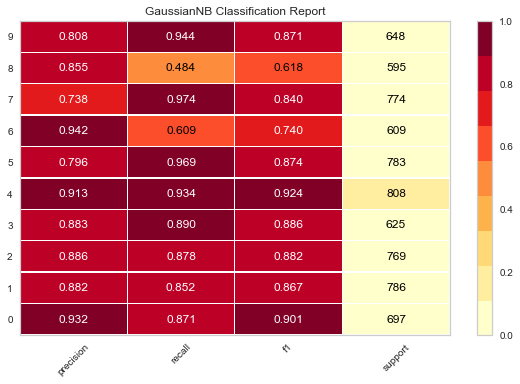

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [24]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.classifier import ClassificationReport
# from yellowbrick.datasets import load_occupancy

# # Load the classification dataset
# X, y = load_occupancy()

# # Specify the target classes
# classes = ["unoccupied", "occupied"]

# # Create the training and test data
# tscv = TimeSeriesSplit()
# for train_scaled, test_scaled in tscv.split(X):
#     X_train, X_test = X.iloc[train_scaled], X.iloc[test_scaled]
#     y_train, y_test = y.iloc[train_scaled], y.iloc[test_scaled]
    
    
# Instantiate the classification model and visualizer
model = GaussianNB()
visualizer = ClassificationReport(model, support=True)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show()                       